In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

In [ ]:
X, y = make_classification(random_state=42, n_classes=3, n_informative=3)

In [ ]:
X

array([[-0.92735313,  2.86238268,  1.1618783 , ...,  0.95030759,
        -2.05021851, -0.30317978],
       [-0.0555477 , -1.73707803, -1.70338244, ...,  0.71754226,
        -1.1877685 ,  1.05842449],
       [ 0.42719436,  1.67714946,  0.9694572 , ...,  0.0928449 ,
        -1.30053337, -0.03322999],
       ...,
       [-0.32483138,  1.83841815,  0.98176549, ..., -1.32308979,
         0.90959411,  1.59450506],
       [-0.57677133, -0.71827025, -0.90756366, ...,  0.04852163,
        -0.78470492,  0.56296924],
       [-0.98717953,  1.3916523 , -0.21113024, ...,  0.89683932,
        -1.23843699, -1.5811907 ]])

In [ ]:
X.shape

(100, 20)

In [ ]:
y

array([2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2,
       1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1,
       0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = neigh.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       1.00      0.33      0.50         9
           2       0.45      1.00      0.62         5

    accuracy                           0.60        20
   macro avg       0.71      0.67      0.60        20
weighted avg       0.76      0.60      0.58        20



In [ ]:
cm = confusion_matrix(y_test, pred, labels=neigh.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)

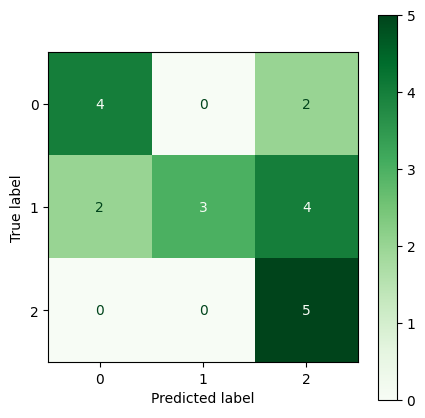

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.show()

In [ ]:
cm

array([[4, 0, 2],
       [2, 3, 4],
       [0, 0, 5]])

In [ ]:
tp_class_0 = cm[0][0]
tp_class_1 = cm[1][1]
tp_class_2 = cm[2][2]

In [ ]:
fp_class_0 = cm[1][0] + cm[2][0]
fp_class_1 = cm[0][1] + cm[2][1]
fp_class_2 = cm[0][2] + cm[1][2]

In [ ]:
tp_all_classes = np.sum(cm.diagonal())

In [ ]:
tp_all_classes

12

In [ ]:
fp_all_classes = fp_class_0 + fp_class_1 + fp_class_2

In [ ]:
fp_all_classes

8

In [ ]:
n_classes = len(neigh.classes_)

In [ ]:
micro_avg = (tp_all_classes/n_classes)/(tp_all_classes/n_classes + fp_all_classes/n_classes)

In [ ]:
'%.2f' % micro_avg

'0.60'

In [ ]:
def precision_one_class(tp, fp):
    return tp / (tp + fp)

In [ ]:
prec_class_0 = precision_one_class(tp_class_0, fp_class_0)
prec_class_1 = precision_one_class(tp_class_1, fp_class_1)
prec_class_2 = precision_one_class(tp_class_2, fp_class_2)

macro_avg = (prec_class_0 + prec_class_1 + prec_class_2) / n_classes

In [ ]:
'%.2f' % macro_avg

'0.71'

In [ ]:
total_examples = np.sum(cm)
support_0, support_1, support_2 = np.sum(cm, axis=1)

weight_0 = support_0/total_examples
weight_1 = support_1/total_examples
weight_2 = support_2/total_examples

weighted_avg = prec_class_0*weight_0 + prec_class_1*weight_1 + prec_class_2*weight_2

In [ ]:
'%.2f' % weighted_avg

'0.76'

In [ ]:
# можно видеть, что в нашем случае микросреднее всех метрик одинаково. В classification_report оно отобразится как accuracy
precision_recall_fscore_support(y_test, pred, average='micro')

(0.6, 0.6, 0.6, None)

In [ ]:
precision_recall_fscore_support(y_test, pred, average='macro')

(0.7070707070707071, 0.6666666666666666, 0.5972222222222222, None)

In [ ]:
precision_recall_fscore_support(y_test, pred, average='weighted')

(0.7636363636363637, 0.6, 0.58125, None)

In [ ]:
# выдача: точность для каждого лейбла, полнота для каждого лейбла, f-мера для каждого лейбла, саппорт каждого лейбла
precision_recall_fscore_support(y_test, pred, average=None, labels=[0, 1, 2])

(array([0.66666667, 1.        , 0.45454545]),
 array([0.66666667, 0.33333333, 1.        ]),
 array([0.66666667, 0.5       , 0.625     ]),
 array([6, 9, 5]))